<a href="https://colab.research.google.com/github/Es-Kiani/AI-ML/blob/main/Medical2-CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

datasets_folder_path = '/content/drive/MyDrive/Datasets'

In [ ]:
!pip install unrar
!rm -rf /content/sample_data

In [ ]:
!unrar x /content/drive/MyDrive/Datasets/Medical2-Dataset-rar/BloodTransversal.rar /content/cnn_data/

In [ ]:
!unrar x /content/drive/MyDrive/Datasets/Medical2-Dataset-rar/CalciumTransversal.rar /content/cnn_data/

In [ ]:
!unrar x /content/drive/MyDrive/Datasets/Medical2-Dataset-rar/FatTransversal.rar /content/cnn_data/

In [ ]:
!unrar x /content/drive/MyDrive/Datasets/Medical2-Dataset-rar/FibrousTransversal.rar /content/cnn_data/

In [ ]:
!unrar x /content/drive/MyDrive/Datasets/Medical2-Dataset-rar/MuscleTransversal.rar /content/cnn_data/

#Data Preprocessing

In [ ]:
import tensorflow as tf
images_generator = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.2)
#images_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator = images_generator.flow_from_directory("/content/cnn_data/", target_size=(15, 15), color_mode="grayscale", batch_size=2000, subset='training')
vali_generator = images_generator.flow_from_directory("/content/cnn_data/", target_size=(15, 15), color_mode="grayscale", batch_size=2000, subset='validation')
#train_images, train_labels = next(images_generator.flow_from_directory("/content/cnn_data/",subset='training'))
#vali_images, vali_labels = next(images_generator.flow_from_directory("/content/cnn_data/",subset='validation'))

In [ ]:
!rm -rf /content/cnn_data/.ipynb_checkpoints

#Creating CNN

In [ ]:
l2_reg = tf.keras.regularizers.l2(l2=0.001)

inputs = tf.keras.Input(shape=(15,15,1), batch_size=2000)

conv1 = tf.keras.layers.Conv2D(64,3,input_shape=(15,15,1),batch_size=2000,kernel_regularizer=l2_reg, padding="same")
x = conv1(inputs)
lrelu = tf.keras.layers.LeakyReLU(alpha=0.01)
x=lrelu(x)
drop = tf.keras.layers.Dropout(0.2)
x=drop(x)

conv2 = tf.keras.layers.Conv2D(64,3, padding="same")
x = conv2(x)
lrelu = tf.keras.layers.LeakyReLU(alpha=0.01)
x=lrelu(x)
drop = tf.keras.layers.Dropout(0.2)
x=drop(x)

conv3 = tf.keras.layers.Conv2D(64,3, padding="same")
x = conv3(x)
lrelu = tf.keras.layers.LeakyReLU(alpha=0.01)
x=lrelu(x)
drop = tf.keras.layers.Dropout(0.2)
x=drop(x)

conv4 = tf.keras.layers.Conv2D(64,3, padding="same")
x = conv4(x)
lrelu = tf.keras.layers.LeakyReLU(alpha=0.01)
x=lrelu(x)
drop = tf.keras.layers.Dropout(0.2)
x=drop(x)

dense1 = tf.keras.layers.Dense(256)
x = dense1(x)
lrelu = tf.keras.layers.LeakyReLU(alpha=0.01)
x=lrelu(x)
drop = tf.keras.layers.Dropout(0.2)
x=drop(x)

flat=tf.keras.layers.Flatten()
x=flat(x)

dense2 = tf.keras.layers.Dense(256)
x = dense2(x)
lrelu = tf.keras.layers.LeakyReLU(alpha=0.01)
x=lrelu(x)
drop = tf.keras.layers.Dropout(0.2)
x=drop(x)

dense3 = tf.keras.layers.Dense(256)
x = dense3(x)
lrelu = tf.keras.layers.LeakyReLU(alpha=0.01)
x=lrelu(x)
drop = tf.keras.layers.Dropout(0.2)
x=drop(x)

dense4 = tf.keras.layers.Dense(5)
x = dense4(x)

layer = tf.keras.layers.Softmax()
output = layer(x)



model = tf.keras.Model(inputs=inputs, outputs=output, name="first_model")



#define loss function variable
loss_fn = tf.keras.losses.CategoricalCrossentropy()
OPTIMIZER = tf.optimizers.AdamW(weight_decay=0.005, learning_rate=1e-03)


#define optimizer,loss function and evaluation metric
model.compile(optimizer=OPTIMIZER,
             loss=loss_fn,
             metrics=[tf.keras.metrics.CategoricalAccuracy()])

model.summary()

Model: "first_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(2000, 15, 15, 1)]       0         
                                                                 
 conv2d_8 (Conv2D)           (2000, 15, 15, 64)        640       
                                                                 
 leaky_re_lu_14 (LeakyReLU)  (2000, 15, 15, 64)        0         
                                                                 
 dropout_14 (Dropout)        (2000, 15, 15, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (2000, 15, 15, 64)        36928     
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (2000, 15, 15, 64)        0         
                                                                 
 dropout_15 (Dropout)        (2000, 15, 15, 64)        

‌

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

SystemError: GPU device not found

#Fit Model

In [ ]:
#trained_model=model.fit(train_images, train_labels,epochs=10,validation_data=(vali_images, vali_labels))
#trained_model=model.fit(train_images, train_labels,batch_size=2000, epochs=10, validation_split=0.2)

trained_model = model.fit(train_generator, epochs=10, batch_size=1000, validation_data=vali_generator)

In [ ]:
#trained_model=model.fit(train_images, train_labels,epochs=10,validation_data=(vali_images, vali_labels))
#trained_model=model.fit(train_images, train_labels,batch_size=2000, epochs=10, validation_split=0.2)
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor="val_loss", mode="min", patience=5, restore_best_weights=True)
trained_model = model.fit(train_generator, epochs=30, batch_size=1000, validation_data=vali_generator, callbacks=[earlystopping])

In [ ]:
earlystopping = callbacks.EarlyStopping(monitor="val_loss", mode="min", patience=5, restore_best_weights=True)
trained_model=model.fit(train_generator,epochs=30,batch_size=1000,validation_data=vali_generator,callbacks=[earlystopping])

In [ ]:
earlystopping = callbacks.EarlyStopping(monitor="val_loss", mode="min", patience=5, restore_best_weights=True)
trained_model=model.fit(train_generator,epochs=30,batch_size=2000,validation_data=vali_generator,callbacks=[earlystopping])

In [ ]:
from keras import callbacks

earlystopping = callbacks.EarlyStopping(monitor="val_categorical_accuracy", mode="max", patience=10, restore_best_weights=True)

history=trained_model=model.fit(train_generator,epochs=50,batch_size=2000,validation_data=vali_generator)

#Model Evaluation

In [ ]:
model.evaluate(train_generator,verbose=2)

In [ ]:
model.evaluate(vali_generator)

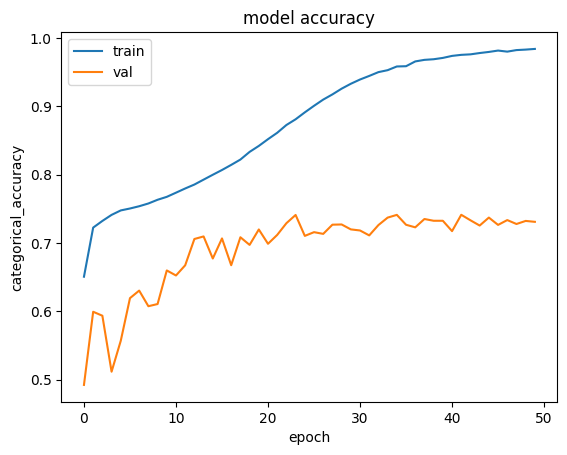

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('categorical_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

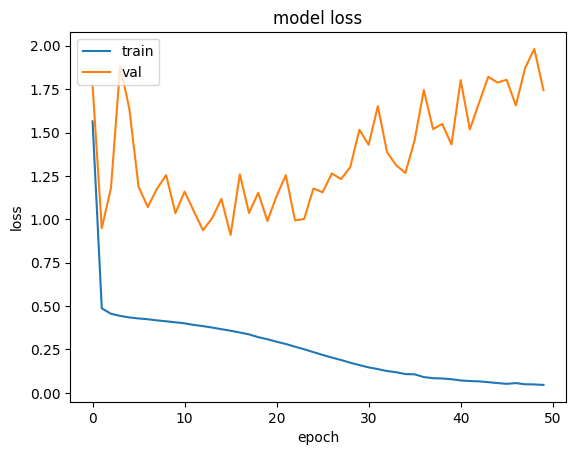

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#Perdiction

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

#Predict
y_prediction = model.predict(next(train_generator))
y_prediction = np.argmax (y_prediction, axis = 1)

#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(train_generator.labels, y_prediction,normalize='true' )
print(result)

#Predict
y_prediction = model.predict(next(vali_generator))
y_prediction = np.argmax (y_prediction, axis = 1)

#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(vali_generator.labels, y_prediction ,normalize='true')
print(result)

63/63 [==============================] - 0s 6ms/step
[[0.9940239  0.00199203 0.00398406]
 [0.         1.         0.        ]
 [0.00129702 0.03631647 0.96238651]]


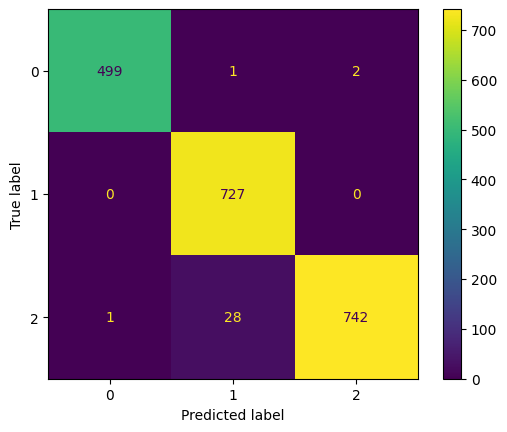

31/31 [==============================] - 15s 488ms/step
[[0.21921559 0.41780211 0.3629823 ]
 [0.224204   0.41364839 0.36214761]
 [0.22158691 0.41649057 0.36192252]]


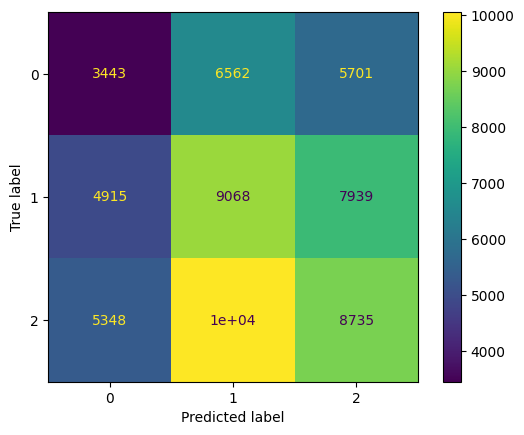

[1 2 1 2 1]
[0 2 2 1 2]


In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import numpy as np

tf.keras.metrics.CategoricalAccuracy()
#Predict
train,train_l=next(train_generator)
train_ll = np.argmax (train_l, axis = 1)
y_prediction1 = model.predict(train)
#y_prediction1=history.model.predict(train_generator,batch_size=2000)
y_prediction1 = np.argmax (y_prediction1, axis = 1)

#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(train_ll, y_prediction1,normalize='true' )
print(result)

ConfusionMatrixDisplay.from_predictions( train_ll, y_prediction1)
plt.show()

#Predict
y_prediction = model.predict(vali_generator,batch_size=2000)
#y_prediction = history.model.predict(vali_generator,batch_size=2000)
y_prediction = np.argmax (y_prediction, axis = 1)

#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(vali_generator.labels, y_prediction ,normalize='true')
print(result)

ConfusionMatrixDisplay.from_predictions( vali_generator.labels, y_prediction)
plt.show()

pred = y_prediction1[:5]
label = y_prediction[:5]

print(pred)
print(label)

In [ ]:
y_prediction1 = model.predict(train_generator,batch_size=1000)
y_prediction = model.predict(vali_generator,batch_size=1000)
print(y_prediction1[:5])
print(train_generator.labels[:5])
print(y_prediction[:5])
print(vali_generator.labels[:5])

In [ ]:
image,l=next(vali_generator)
plt.imshow(image[0])
print(image[0])
print(l[0])

In [ ]:
y_p1 = np.argmax (y_prediction1, axis = 1)
y_p = np.argmax (y_prediction, axis = 1)
print(y_p1[:5])
print(y_p[:5])

#Perdiction Evaluation

In [ ]:
model.evaluate(train_generator,batch_size=2000)

245/245 [==============================] - 132s 538ms/step - loss: 0.6390 - accuracy: 0.7107


[0.6390305161476135, 0.7107455134391785]

In [ ]:
model.evaluate(vali_generator,batch_size=2000)

62/62 [==============================] - 33s 538ms/step - loss: 0.8754 - accuracy: 0.6443


[0.8753963112831116, 0.6443225741386414]

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

#Predict
y_prediction = model.predict(train_images)

y_prediction = np.argmax (y_prediction, axis = 1)
y_test=np.argmax(train_labels, axis=1)

#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(y_test, y_prediction )
print(result)

#Predict
y_prediction = model.predict(vali_images)

y_prediction = np.argmax (y_prediction, axis = 1)
y_test=np.argmax(vali_labels, axis=1)

#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(y_test, y_prediction )
print(result)

In [ ]:
vali_generator.labels

array([0, 0, 0, ..., 4, 4, 4], dtype=int32)